# Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar Datos

In [2]:
xls = pd.ExcelFile('Datos.xlsx')

* **Def** : Deformación del Material
* **Esfuerzo**
* **SR**: Tasa de deformación (Strain Rate)

In [3]:
# Strain Rate 1000 s^-1

D1000 = pd.read_excel(xls,"1000")
D1000["SR"] = np.ones(len(D1000))*1000
D1000.head()

,Def,Esfuerzo [MPa],SR
0,0.000,0.000000,1000.0
1,0.001,39.237729,1000.0
2,0.002,52.046877,1000.0
3,0.003,86.014298,1000.0
4,0.004,94.475457,1000.0


In [4]:
# Strain Rate 1800 s^-1

D1800 = pd.read_excel(xls,"1800")
D1800["SR"] = np.ones(len(D1800))*1800
D1800.head()

,Def,Esfuerzo [MPa],SR
0,0.000,0.000000,1800.0
1,0.001,90.925511,1800.0
2,0.002,166.747471,1800.0
3,0.003,182.794030,1800.0
4,0.004,188.851022,1800.0


In [5]:
# Strain Rate 2500 s^-1

D2500 = pd.read_excel(xls,"2500")
D2500["SR"] = np.ones(len(D2500))*2500
D2500.head()

,Def,Esfuerzo [MPa],SR
0,0.000,0.000000,2500.0
1,0.002,266.524845,2500.0
2,0.004,330.264104,2500.0
3,0.006,305.989783,2500.0
4,0.008,333.049690,2500.0


In [6]:
# Strain Rate 3000 s^-1

D3000 = pd.read_excel(xls,"3000")
D3000["SR"] = np.ones(len(D3000))*3000
D3000.head()

,Def,Esfuerzo [MPa],SR
0,0.000,0.000000,3000.0
1,0.002,533.782809,3000.0
2,0.004,599.699988,3000.0
3,0.006,604.096843,3000.0
4,0.008,626.565617,3000.0


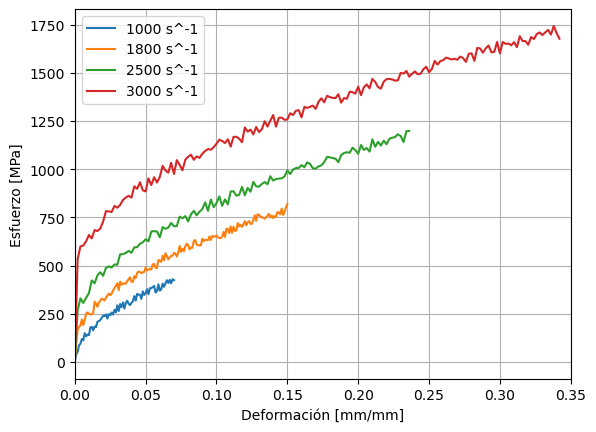

In [7]:
# Plot Datos

plt.plot(D1000["Def"],D1000["Esfuerzo [MPa]"], label = "1000 s^-1")
plt.plot(D1800["Def"],D1800["Esfuerzo [MPa]"], label = "1800 s^-1")
plt.plot(D2500["Def"],D2500["Esfuerzo [MPa]"], label = "2500 s^-1")
plt.plot(D3000["Def"],D3000["Esfuerzo [MPa]"], label = "3000 s^-1")
plt.legend()
plt.grid()
plt.xlim([0,0.35])
plt.xlabel("Deformación [mm/mm]")
plt.ylabel("Esfuerzo [MPa]")
plt.show()

In [8]:
# Cantidad de Datos

print("Datos a 1000 s^-1:", len(D1000))
print("Datos a 1800 s^-1:", len(D1800))
print("Datos a 2500 s^-1:", len(D2500))
print("Datos a 3000 s^-1:", len(D3000))
print("Datos totales:", len(D1000)+len(D1800)+len(D2500)+len(D3000))

Datos a 1000 s^-1: 71
Datos a 1800 s^-1: 151
Datos a 2500 s^-1: 119
Datos a 3000 s^-1: 172
Datos totales: 513


In [9]:
# Concatenar los datos

frames = [D1000, D1800,D2500,D3000]
result = pd.concat(frames)

In [10]:
result.shape

(513, 3)

# Ajuste de curvas no lineales multivariables

In [11]:
from scipy.optimize import curve_fit

## Ley de Potencias

$$ \sigma = k\varepsilon^{m}\dot{\varepsilon}^{n}$$

In [12]:
# Función

def power (x,k,n,m):
    return k*(x[0]**n)*(x[1]**m)

In [13]:
# Datos dependientes e independientes

xdata = [result["Def"].values,result["SR"].values] # Deformación y tasa de deformación
ydata = result["Esfuerzo [MPa]"].values # Esfuerzo

In [14]:
# Ajuste de datos

# Constantes: k, m, n

g = [0,0,0] # Valor inicial de las constantes
c, cov = curve_fit(f = power,
                   xdata = xdata,
                   ydata = ydata,
                   p0 = g,
                   bounds=((-np.inf, -np.inf, -np.inf), (np.inf, np.inf, np.inf)))
print(c) # Solución

[0.5433029  0.34617217 1.05045152]


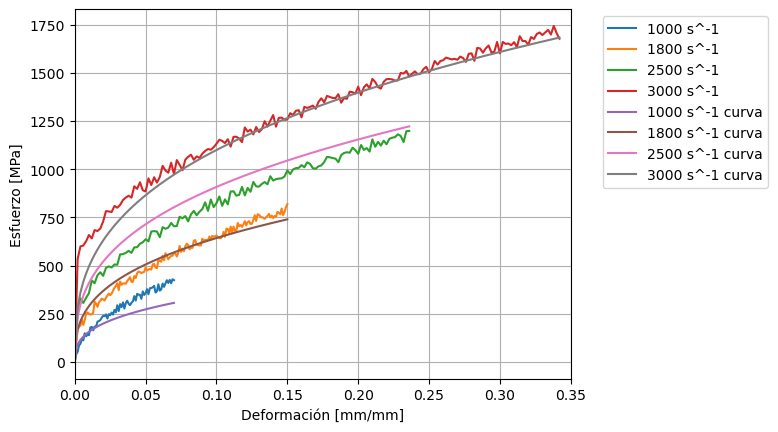

In [15]:
# Gráfica del modelo no-lineal multivariable

k = c[0]
n = c[1]
m = c[2]

fun1000 = k*(D1000["Def"].values)**n*(D1000["SR"].values)**m
fun1800 = k*(D1800["Def"].values)**n*(D1800["SR"].values)**m
fun2500 = k*(D2500["Def"].values)**n*(D2500["SR"].values)**m
fun3000 = k*(D3000["Def"].values)**n*(D3000["SR"].values)**m

plt.plot(D1000["Def"],D1000["Esfuerzo [MPa]"], label = "1000 s^-1")
plt.plot(D1800["Def"],D1800["Esfuerzo [MPa]"], label = "1800 s^-1")
plt.plot(D2500["Def"],D2500["Esfuerzo [MPa]"], label = "2500 s^-1")
plt.plot(D3000["Def"],D3000["Esfuerzo [MPa]"], label = "3000 s^-1")

plt.plot(D1000["Def"],fun1000, label = "1000 s^-1 curva")
plt.plot(D1800["Def"],fun1800, label = "1800 s^-1 curva")
plt.plot(D2500["Def"],fun2500, label = "2500 s^-1 curva")
plt.plot(D3000["Def"],fun3000, label = "3000 s^-1 curva")

plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()
plt.xlim([0,0.35])
plt.xlabel("Deformación [mm/mm]")
plt.ylabel("Esfuerzo [MPa]")
plt.show()

In [16]:
# Cálculo del R^2

def r2cal (DF,fun):
    res = DF["Esfuerzo [MPa]"] - fun
    ss_res = np.sum(res**2)
    ss_tot = np.sum((DF["Esfuerzo [MPa]"]-np.mean(DF["Esfuerzo [MPa]"]))**2)
    r2 = 1 - ss_res/ss_tot
    return r2

In [17]:
# R^2 por tasa de deformación

r1000 = r2cal(D1000,fun1000)
r1800 = r2cal(D1800,fun1800)
r2500 = r2cal(D2500,fun2500)
r3000 = r2cal(D3000,fun3000)

print("El R2 para la curva de tasa de deformación de 1000s-1 es:", r1000)
print("El R2 para la curva de tasa de deformación de 1800s-1 es:", r1800)
print("El R2 para la curva de tasa de deformación de 2500s-1 es:", r2500)
print("El R2 para la curva de tasa de deformación de 3000s-1 es:", r3000)
print("El R2 promedio:", np.mean([r1000,r1800,r2500,r3000]))

El R2 para la curva de tasa de deformación de 1000s-1 es: 0.5765203914958335
El R2 para la curva de tasa de deformación de 1800s-1 es: 0.965421897358136
El R2 para la curva de tasa de deformación de 2500s-1 es: 0.9205394019177199
El R2 para la curva de tasa de deformación de 3000s-1 es: 0.9709839374800924
El R2 promedio: 0.8583664070629453


## Modelo Johnson-Cook

$$ \sigma = [A + B\varepsilon^{n}]\left[1 + K\ln{\left(\frac{\dot{\varepsilon}}{\dot{\varepsilon}_{0}}\right)}\right]$$

In [18]:
# Función

def JC (x,A,B,K,n):
    return (A+B*(x[0]**n))*(1+K*np.log(x[1]/2000))

In [19]:
# Datos dependientes e independientes

xdata = [result["Def"].values,result["SR"].values] # Deformación y tasa de deformación
ydata = result["Esfuerzo [MPa]"].values # Esfuerzo

In [20]:
# Ajuste de datos

# Constantes: A, B, n, K

g = [700,500,0,0.5]
c, cov = curve_fit(f = JC,xdata = xdata,ydata = ydata,p0 = g, bounds=((0, 0, 0, 0), (np.inf, np.inf,np.inf,np.inf)))
print(c)

[1.40443575e+02 1.85524950e+03 8.66191793e-01 4.73251979e-01]


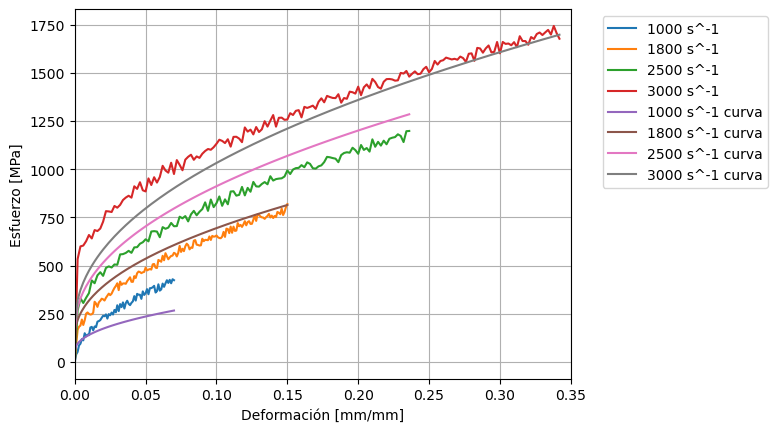

In [21]:
# Gráfica del modelo no-lineal multivariable

A = c[0]
B = c[1]
K = c[2]
n = c[3]


fun1000 = (A+B*D1000["Def"]**n)*(1+K*np.log(D1000["SR"]/2000))
fun1800 = (A+B*D1800["Def"]**n)*(1+K*np.log(D1800["SR"]/2000))
fun2500 = (A+B*D2500["Def"]**n)*(1+K*np.log(D2500["SR"]/2000))
fun3000 = (A+B*D3000["Def"]**n)*(1+K*np.log(D3000["SR"]/2000))

plt.plot(D1000["Def"],D1000["Esfuerzo [MPa]"], label = "1000 s^-1")
plt.plot(D1800["Def"],D1800["Esfuerzo [MPa]"], label = "1800 s^-1")
plt.plot(D2500["Def"],D2500["Esfuerzo [MPa]"], label = "2500 s^-1")
plt.plot(D3000["Def"],D3000["Esfuerzo [MPa]"], label = "3000 s^-1")

plt.plot(D1000["Def"],fun1000, label = "1000 s^-1 curva")
plt.plot(D1800["Def"],fun1800, label = "1800 s^-1 curva")
plt.plot(D2500["Def"],fun2500, label = "2500 s^-1 curva")
plt.plot(D3000["Def"],fun3000, label = "3000 s^-1 curva")

plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()
plt.xlim([0,0.35])
plt.xlabel("Deformación [mm/mm]")
plt.ylabel("Esfuerzo [MPa]")
plt.show()

In [22]:
# R^2 por tasa de deformación

r1000 = r2cal(D1000,fun1000)
r1800 = r2cal(D1800,fun1800)
r2500 = r2cal(D2500,fun2500)
r3000 = r2cal(D3000,fun3000)

print("El R2 para la curva de tasa de deformación de 1000s-1 es:", r1000)
print("El R2 para la curva de tasa de deformación de 1800s-1 es:", r1800)
print("El R2 para la curva de tasa de deformación de 2500s-1 es:", r2500)
print("El R2 para la curva de tasa de deformación de 3000s-1 es:", r3000)
print("El R2 promedio:", np.mean([r1000,r1800,r2500,r3000]))

El R2 para la curva de tasa de deformación de 1000s-1 es: 0.1271510249413219
El R2 para la curva de tasa de deformación de 1800s-1 es: 0.9132236549645039
El R2 para la curva de tasa de deformación de 2500s-1 es: 0.8745590900837622
El R2 para la curva de tasa de deformación de 3000s-1 es: 0.9260609903246799
El R2 promedio: 0.710248690078567


## Modelo Cowper-Symonds

$$\sigma = E_{tan}\varepsilon + \sigma_{Y} - \frac{E_{tan}\sigma_{Y}}{E} $$

$$ \sigma_{Y} = \sigma_{0}\left[1 + \left(\frac{\dot{\varepsilon}}{D}\right)^{\frac{1}{p}}\right]$$



In [23]:
# Función

def CS (x,D,P,E):
    s1 = 250*(1+(x[1]/D)**(1/P))
    return E*x[0]+s1-(E*s1)/90000

In [24]:
# Datos dependientes e independientes

xdata = [result["Def"].values,result["SR"].values] # Deformación y tasa de deformación
ydata = result["Esfuerzo [MPa]"].values # Esfuerzo

In [25]:
# Ajuste de datos

# Constantes: D, P, E

g = [100,100,50]
c, cov = curve_fit(f = CS,xdata = xdata,ydata = ydata,p0 = g, bounds=((0, 0, 0), (np.inf, np.inf,90000)))
print(c)

[2.55750641e+03 2.28202541e-01 3.24989884e+03]


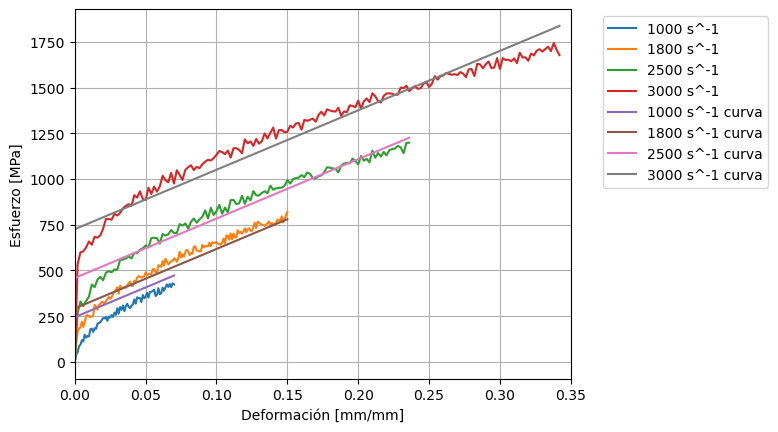

In [26]:
# Gráfica del modelo no-lineal multivariable

D = c[0]
P = c[1]
E = c[2]


fun1000 = E*D1000["Def"]+(250*(1+(D1000["SR"]/D)**(1/P)))-(E*(250*(1+(D1000["SR"]/D)**(1/P))))/90000
fun1800 = E*D1800["Def"]+(250*(1+(D1800["SR"]/D)**(1/P)))-(E*(250*(1+(D1800["SR"]/D)**(1/P))))/90000
fun2500 = E*D2500["Def"]+(250*(1+(D2500["SR"]/D)**(1/P)))-(E*(250*(1+(D2500["SR"]/D)**(1/P))))/90000
fun3000 = E*D3000["Def"]+(250*(1+(D3000["SR"]/D)**(1/P)))-(E*(250*(1+(D3000["SR"]/D)**(1/P))))/90000

plt.plot(D1000["Def"],D1000["Esfuerzo [MPa]"], label = "1000 s^-1")
plt.plot(D1800["Def"],D1800["Esfuerzo [MPa]"], label = "1800 s^-1")
plt.plot(D2500["Def"],D2500["Esfuerzo [MPa]"], label = "2500 s^-1")
plt.plot(D3000["Def"],D3000["Esfuerzo [MPa]"], label = "3000 s^-1")

plt.plot(D1000["Def"],fun1000, label = "1000 s^-1 curva")
plt.plot(D1800["Def"],fun1800, label = "1800 s^-1 curva")
plt.plot(D2500["Def"],fun2500, label = "2500 s^-1 curva")
plt.plot(D3000["Def"],fun3000, label = "3000 s^-1 curva")

plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()
plt.xlim([0,0.35])
plt.xlabel("Deformación [mm/mm]")
plt.ylabel("Esfuerzo [MPa]")
plt.show()

In [27]:
# R^2 por tasa de deformación

r1000 = r2cal(D1000,fun1000)
r1800 = r2cal(D1800,fun1800)
r2500 = r2cal(D2500,fun2500)
r3000 = r2cal(D3000,fun3000)

print("El R2 para la curva de tasa de deformación de 1000s-1 es:", r1000)
print("El R2 para la curva de tasa de deformación de 1800s-1 es:", r1800)
print("El R2 para la curva de tasa de deformación de 2500s-1 es:", r2500)
print("El R2 para la curva de tasa de deformación de 3000s-1 es:", r3000)
print("El R2 promedio:", np.mean([r1000,r1800,r2500,r3000]))

El R2 para la curva de tasa de deformación de 1000s-1 es: 0.2625623139472919
El R2 para la curva de tasa de deformación de 1800s-1 es: 0.9171332496350741
El R2 para la curva de tasa de deformación de 2500s-1 es: 0.9333843292830392
El R2 para la curva de tasa de deformación de 3000s-1 es: 0.9290320078255659
El R2 promedio: 0.7605279751727427
